<font style="font-family:roboto;color:#455e6c;font-size:18px;text-align:justify"> <b> An exhaustive example with an ODS steel <br> </b> </font>

This is a tutorial on how to use the paraprobe-toolbox and pyiron for processing a dataset with procedures which are better aligned with the aims of the FAIR data stewardship principles. [The dataset](https://doi.org/10.1017/S1431927618015386) is an ODS steel with Y-containing titanium oxide dispersoids which was characterized by J. Wang and coworkers.

The analyses here show how tools and functionalities of the paraprobe-toolbox can be combined, results transferred between these tools, and NeXus and HDF5 used in concert, to analyze the authors' dataset. Specifically, here we show how precipitates can be reconstructed using iso-surfaces. Furthermore, we will show how to characterize individual sections of these iso-surfaces and perform spatial location analyses which identify how close specific objects are to one another.

What makes the paraprobe-toolbox approach special is not only its efficiency and documentation capabilities per se but how these capabilities enable systematic studies of how the analysis results depend on the parameterization of the computational geometry methods which are typically used for analyzing atom probe data. Such parameter sensitivity studies are useful because techniques like delocalization, iso-surfaces, and composition analyses can show significant variation based on which regions-of-interest (ROIs) are chosen.

The following analyses is a computational workflow with several steps:

1. Pre-processing of an existent dataset, reconstructed and ranged, creating a model for the edge of the dataset (reconstructed volume) for handling and correcting for finite size (edge) effects, distancing of all ions to this edge, and tessellating the entire dataset using a Voronoi tessellation.

2. Perform multiple analyses of objects, here exemplified by objects containing Y+Ti+O, i.e. ODS steel-relevant yttria dispersoids likely, using different iso-composition values. The objects will be characterized with commonly used descriptors (volume fraction, number, composition, size and shape distribution). In the process, triangulated surface meshes for each object will be created. These meshes are the input for the intersection analyses.
3. Portions of iso-surface meshes for arbitrary datasets have not necessarily all sections which are watertight. This example will also show how these incomplete/patchy portions of the iso-surface can be post-processed by replacing them with so-called proxies to obtain models of watertight objects.<br>
4. Finally, the example shows how paraprobe-intersector can be used to analyze the spatial arrangement of different objects using proximity and intersection analyses.

In summary, this tutorial shows how all tools, i.e. jupyter-lab, h5web, and the C++ and Python tools of the paraprobe-toolbox work together as pyiron jobs to programmatically instruct, execute, and document the above-described analyses. This makes the tutorial the starting point for any more sophisticated analysis where users have the full control which tools they wish to combine. Ideally this motivates that in principle these tools not only need to come from the paraprobe-toolbox but that also other software tools could be injected as individual workflow steps to compensate or analyses not offered by the paraprobe-toolbox.

Imports:

In [1]:
from pyiron_base import Project
from apt_jobs.paraprobe_ranger_job import ParaprobeRanger
from apt_jobs.paraprobe_surfacer_job import ParaprobeSurfacer
from apt_jobs.paraprobe_distancer_job import ParaprobeDistancer
from apt_jobs.paraprobe_tessellator_job import ParaprobeTessellator
from apt_jobs.paraprobe_nanochem_job import ParaprobeNanochem

In [9]:
from jupyterlab_h5web import H5Web

Create a Project, which is the central object in pyiron

In [2]:
pr = Project('paraprobe-apt')

### Create a Job to apply existent rangings

In [4]:
job = pr.create_job(job_type=ParaprobeRanger, job_name="rangerjob", 
                    delete_existing_job=True)
job.pos_file = "data/R31_06365-v02.pos"
job.rrng_file = "data/R31_06365-v02.rrng"
job.run()

The job t6 was saved and received the ID: 1


pyiron offers convenience methods to easily check the outputs

In [12]:
job.output.ranger

DataContainer({'ion_count': 4868202, 'unit': 'at. wt%', 'Unranged': 4.8925, 'C': 0.0081, 'O': 0.0108, 'Ti': 0.0076, 'Fe': 0.0194, 'Al': 0.0123, 'Si': 0.0046, 'Cr': 0.0236, 'Mn': 0.0469, 'Co': 0.0249, 'Y': 0.0579, 'Ga': 0.0153, 'Ni': 0.0669, 'V': 0.0283, 'Mo': 0.1524, 'B': 0.0078, 'As': 0.003})

It is possible to check the logs generated by paraprobe

In [14]:
job.output.log

DataContainer({'configure': DataContainer({'transcoder': 'Computing SHA256 hash for file named /home/jovyan/testc/t6_hdf5/t6/R31_06365-v02.pos\nComputing SHA256 hash for file named /home/jovyan/testc/t6_hdf5/t6/R31_06365-v02.rrng\nInspecting whether NeXus/HDF5 is used...\nparaprobe-transcoder will be needed to transcode vendor\nfile formats for reconstruction and ranging into HDF5.\nTools will read recon/ranging from the transcoder results file.\nWriting configuration file ...\nPARAPROBE.Transcoder.Config.SimID.636502001.nxs was written successfully.\n', 'ranger': 'Using old transcoder/ranger file format, this will become deprecated!\nComputing SHA256 hash for file named /home/jovyan/testc/t6_hdf5/t6/PARAPROBE.Transcoder.Results.SimID.636502001.nxs\nComputing SHA256 hash for file named /home/jovyan/testc/t6_hdf5/t6/PARAPROBE.Transcoder.Results.SimID.636502001.nxs\nWriting configuration file ...\nPARAPROBE.Ranger.Config.SimID.636502001.nxs was written successfully.\n'}), 'execute': DataContainer({'transcoder': 'Processing configuration file\t\t:PARAPROBE.Transcoder.Config.SimID.636502001.nxs\nProcessing reconstruction\t\t:/home/jovyan/testc/t6_hdf5/t6/R31_06365-v02.pos\nProcessing ranging\t\t:/home/jovyan/testc/t6_hdf5/t6/R31_06365-v02.rrng\nResults file\t\t:PARAPROBE.Transcoder.Results.SimID.636502001.nxs\nUse paraprobe-transcoder to transcode vendor files\nTranscoded reconstruction and mass-to-charge-state ratios\nTranscoded ranging data for /home/jovyan/testc/t6_hdf5/t6/R31_06365-v02.rrng\nTranscoded ranging definitions\nparaprobe-transcoder finished, took 0.2805715060021612 seconds\n', 'ranger': 'paraprobe-ranger\nA tool of the FAIRmat atom probe microscopy analytics toolbox for materials scientists\nSupporting the community with strong-scaling and open tools for robust and automated uncertainty quantification...\n\nThe compiled code of this tool uses the source code with the following GitSha:\n0\n\nParaprobe can be cited via the following papers...\nCollecting 5 publications for the tool to cite:\nArticle\nM. K"uhbach and P. Bajaj and A. Breen and E. A. J"agle and B. Gault\nOn Strong Scaling Open Source Tools for Mining Atom Probe Tomography Data\nMicroscopy and Microanalysis, 2019, Volume 25, Supplement S2, pp298-299\nhttps://doi.org/10.1017/S1431927619002228\n\n\nArticle\nM. K"uhbach and P. Bajaj and H. Zhao and M. H. C"{c}elik E. A. J"agle and B. Gault\nOn strong-scaling and open-source tools for analyzing atom probe tomography data\nnpj Computational Materials, 2021, Volume 7, ppArticle number 21\nhttps://doi.org/10.1038/s41524-020-00486-1\n\n\nArticle\nM. K"uhbach and A. J. London  and J. Wang and D. K. Schreiber and F. Mendez-Martin and I. Ghamarian and H. Bilal and A. V.Ceguerra\nCommunity-Driven Methods for Open and Reproducible Software Tools for Analyzing Datasets from Atom Probe Microscopy\nMicroscopy and Microanalysis, 2021, pp1-16\nhttps://doi.org/10.1017/S1431927621012241\n\n\nArticle\nM. K"uhbach and M. Kasemer and A. Breen and B. Gault\nOpen and strong-scaling tools for atom-probe crystallography: high-throughput methods for indexing crystal structure and orientation\nJournal of Applied Crystallography, 2021, Volume 54, pp1490-1508\nhttps://doi.org/10.1107/S1600576721008578\n\n\nPreprint\nM. K"uhbach and V. V. Rielli and S. Primig and A. Saxena and B. Jenkins and D. Mayweg and A. Reichmann and S. Kardos and L. Romaner and S. Brockhauser\nCGM paper\narXiv, 2022\nhttps://arxiv.org/abs/2205.13510\n\n\nReading configuration from PARAPROBE.Ranger.Config.SimID.636502001.nxs\nReading /entry/number_of_processes success\ndims[0] 1 sdim 79\nrbuf.size() 79\nReading /entry/process0/range_with_existent_iontypes/dataset/filename success\ndims[0] 1 sdim 57\nrbuf.size() 57\nReading /entry/process0/range_with_existent_iontypes/dataset/dataset_name_reconstruction success\ndims[0] 1 sdim 59\nrbuf.size() 59\nReading /entry/process0/range_with_existent_iontypes/dataset/dataset_name_mass_to_charge success\ndims[0] 1 sdim 79\nrbu

### Create a triangle surface mesh model for the edge of the dataset

In [5]:
job2 = pr.create_job(job_type=ParaprobeSurfacer, job_name="t7", 
                    delete_existing_job=True)
job2.ranger_job = job
job2.pos_file = "data/R31_06365-v02.pos"
job2.rrng_file = "data/R31_06365-v02.rrng"
job2.run()

The job t7 was saved and received the ID: 2


In [10]:
H5Web(job2._surfacer_results)

<jupyterlab_h5web.widget.H5Web object>

### Compute Euclidean distances of all ions to the edge of the dataset

In [6]:
job3 = pr.create_job(job_type=ParaprobeDistancer, job_name="t8", 
                    delete_existing_job=True)
job3.ranger_job = job
job3.surfacer_job = job2
job3.pos_file = "data/R31_06365-v02.pos"
job3.rrng_file = "data/R31_06365-v02.rrng"
job3.run()

The job t8 was saved and received the ID: 3


### Tessellate the ion point cloud

In [7]:
job4 = pr.create_job(job_type=ParaprobeTessellator, job_name="t9", 
                    delete_existing_job=True)
job4.ranger_job = job
job4.distancer_job = job3
job4.pos_file = "data/R31_06365-v02.pos"
job4.rrng_file = "data/R31_06365-v02.rrng"
job4.run()

The job t9 was saved and received the ID: 4


Once again, paraprobe-autoreporter allows for easy access of results

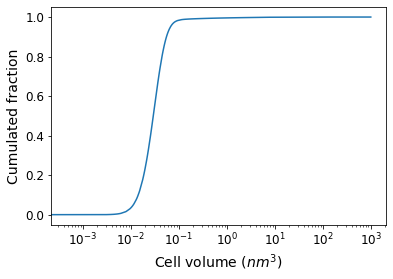

In [8]:
job4.plot()

The preprint to the paper that is associated with this analysis is available [here](https://doi.org/10.48550/arXiv.2205.13510). Used [NeXus/HDF5 data schemes](https://doi.org/10.48550/arXiv.2205.13510) can be found here.